<span style="font-family: 'Times New Roman'; font-size: 18px;">
    
# LendingClub Loan Repayment Prediction
## Introduction

In the ever-evolving landscape of peer-to-peer lending, accurate and reliable predictions of loan repayments are crucial for both lenders and borrowers. This project focuses on leveraging historical loan data from LendingClub, the world's largest peer-to-peer lending platform, to build a predictive model that determines whether a borrower will repay their loan. By analyzing key features and trends within the dataset, this model aims to aid in assessing the risk associated with potential borrowers, thereby enhancing decision-making processes for lending.

## Import libraries
We import usual libraries
</span>

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<span style="font-family: 'Times New Roman'; font-size: 18px;">

## Get the Data

Pandas is utilized for loading our data into a dataframe named df.
</span>

In [129]:
df = pd.read_csv('lending_club_loan_two.csv')

<span style="font-family: 'Times New Roman'; font-size: 18px;">


We check out the info() methods on df. 

</span>


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

<span style="font-family: 'Times New Roman'; font-size: 18px;">

## Exploratory Data Analysis

The count plot below shows a significant imbalance, with many more loans marked as "Fully Paid" compared to "Charged Off". This suggests that the majority of individuals in the dataset managed to pay back their loans without issues. Conducting a count plot is a beneficial approach, particularly for classification tasks, to examine the true distribution of the data. Due to this disparity, we are likely achieving high accuracy, but the real measures we need to assess our model will be precision and recall. Given the significant imbalance in our dataset, we shouldn't anticipate strong performance in those areas.
    
</span>

<Axes: xlabel='loan_status', ylabel='count'>

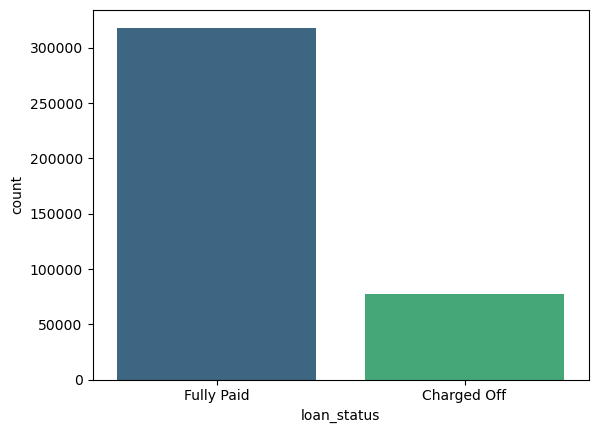

In [131]:
sns.countplot(x='loan_status',data=df, hue='loan_status', palette='viridis')

<span style="font-family: 'Times New Roman'; font-size: 18px;">

To explore the distribution of loan amounts, we created a histogram of the loan_amnt column. 
The resulting histogram reveals significant peaks around the 5,000 and 10,000 dollars, indicating these
amounts are the most common loan sizes among borrowers in our dataset. This insight is crucial for understanding
borrower behavior and tailoring financial products to meet their needs effectively.

</span>

C:\Users\rojin\AppData\Local\Temp\ipykernel_14876\238418593.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'], kde=False, bins=40)


<Axes: xlabel='loan_amnt'>

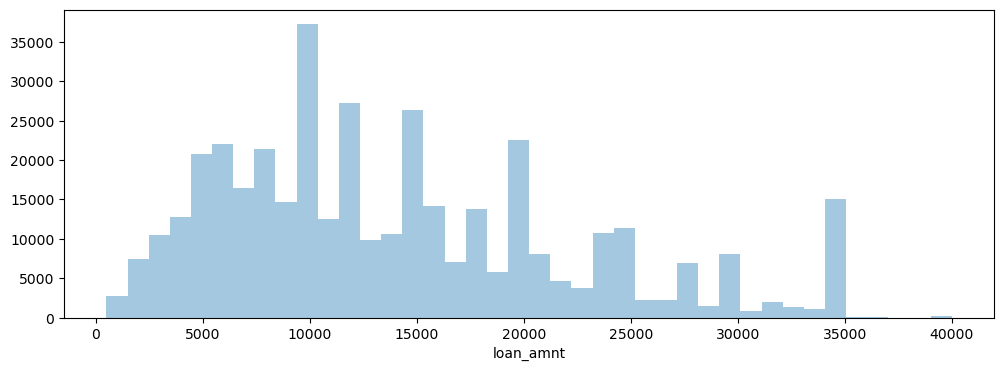

In [132]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'], kde=False, bins=40)

In [133]:
print(df['loan_amnt'].unique())  # Replace 'loan_term' with the actual column name


[10000.  8000. 15600. ... 36275. 36475.   725.]


In [134]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


<span style="font-family: 'Times New Roman'; font-size: 18px;">
Let's explore the correlation between continuous feature variables. Beforehand, we need to handle non-numerical columns to be able to apply statistical methods, this is done by using frequency rather than simple coding into integers.
 </span>


In [135]:
# Identify non-numeric columns
non_numeric_columns = []
for column in df.columns:
    try:
        df[column].astype(float)
    except ValueError:
        non_numeric_columns.append(column)

print("Columns that cannot be converted to float:", non_numeric_columns)


# Apply frequency encoding to non-numeric columns
for column in non_numeric_columns:
    freq_encoding = df[column].value_counts().to_dict()
    df[column] = df[column].map(freq_encoding)



Columns that cannot be converted to float: ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']


<span style="font-family: 'Times New Roman'; font-size: 18px;">
Now we want to visualize the correlation that we have calculated.This heatmap illustrates the different relationships among features, revealing a perfect correlation along the diagonal. Additionally, there is a strong correlation with the installment feature, and the loan amount shows a correlation of 0.95 with installments, prompting us to investigate this feature in more detail.</span>


<Axes: >

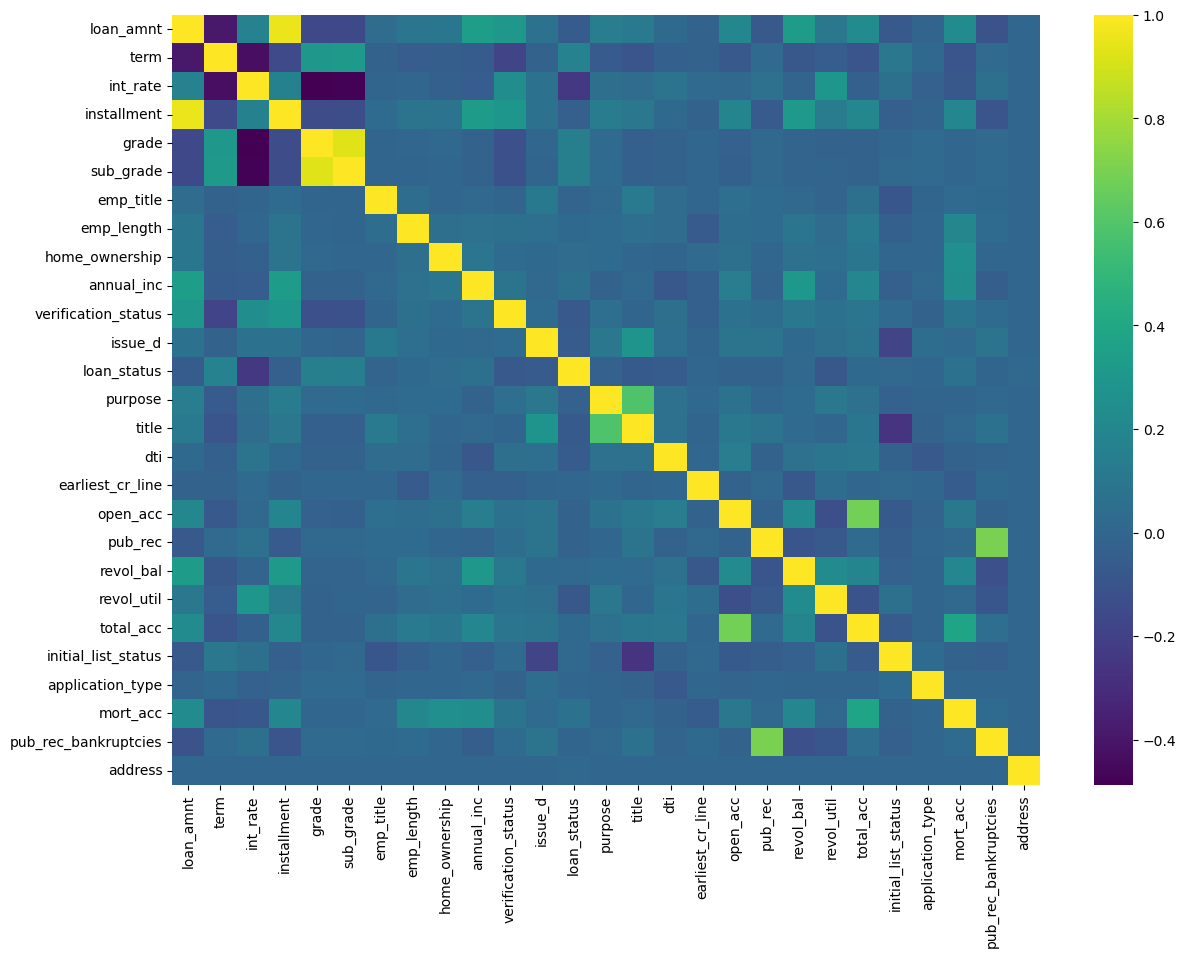

In [136]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),cmap='viridis')

In [137]:
#non_numeric_columns = ['grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type']

# Ensure only existing columns are dropped
#columns_to_drop = [col for col in non_numeric_columns if col in df.columns]
#df.drop(columns=columns_to_drop, inplace=True)


<span style="font-family: 'Times New Roman'; font-size: 18px;">
Upon examining the features of loan amount and installment, it becomes clear that there is a strong relationship between the two. This correlation likely stems from an internal formula utilized by the company, which is quite logical. When you lend a person one million dollars, it’s reasonable to anticipate that, based on a certain calculation, your monthly repayment amounts will be significantly elevated. You’re likely to apply that same formula even when you lend a person a thousand bucks. It is probable that there will be a connection between those payments. It appears that they are employing a specific calculation method that directly relates to the size of the loan in order to determine the appropriate payment amount. To validate this, we could generate a scatter plot. </span>

In [139]:
#feat_info('loan_amnt')

In [141]:
#feat_info('installment')

<Axes: xlabel='installment', ylabel='loan_amnt'>

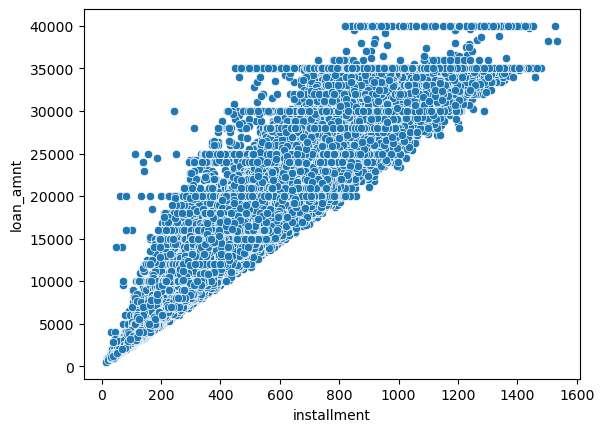

In [142]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

In [143]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [144]:
df['grade'].unique()

array([116018,  64187, 105987,  31488,  63524,  11772,   3054],
      dtype=int64)


<span style="font-family: 'Times New Roman'; font-size: 18px;">

In this section, we document our original dataframe, referred to as df1, and proceed with our tasks using it.  

 </span>



In [145]:
df1 = pd.read_csv('lending_club_loan_two.csv')

<span style="font-family: 'Times New Roman'; font-size: 18px;">
Our next step is to generate a box plot that illustrates the correlation 
    between the status of loans and their respective amounts. This box plot illustrates the response to the inquiry regarding the connection between high-cost loans and the inability to repay them, as well as low-value loans that are fully paid off. It enables us to investigate this relationship, and overall, the results appear quite similar. The average for charged-off loans is slightly elevated in this box plot, indicating that a higher loan amount correlates with a marginally greater chance of default. Which again intuitively makes sense that it's harder to pay back larger loans than smaller ones.   </span>

C:\Users\rojin\AppData\Local\Temp\ipykernel_14876\1545644459.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='loan_amnt',data=df1, palette='Set2')


<Axes: xlabel='loan_status', ylabel='loan_amnt'>

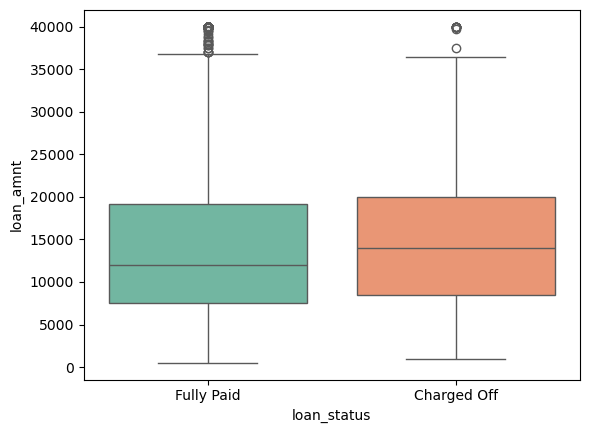

In [146]:
sns.boxplot(x='loan_status', y='loan_amnt',data=df1, palette='Set2')

<span style="font-family: 'Times New Roman'; font-size: 18px;">

In this section, we compute the summary statistics for the loan amounts, grouped according to their loan status.
The table below shows us the quantitative 
numbers behind this box plot. Here we can see that the charged off average price is a little higher than the fully paid loan. 
So, the averages of the loans for people that aren't able to pay them back are slightly higher than the averages
for people that do pay off their loans. 
    
   </span>

In [147]:
df1.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


<span style="font-family: 'Times New Roman'; font-size: 18px;">
    
Following that, we examine the columns for grade and sub-grade that LendingClub assigns to its loans. The primary question focuses on determining the various grades along with their specific subgrades. By employing the .unique() method, we can extract unique values. The subgrades reveal details about the primary grade, as they include both the letter grade and an additional character that provides further context. 

 </span>

In [148]:
df1['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [149]:
df1['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<span style="font-family: 'Times New Roman'; font-size: 18px;">
    
 Our goal is to generate a count plot for each grade, with the loan status label represented by different colors. This approach allows us to determine whether there is a distinction between completely settling your debt or having it written off according to your score. 
<br>The count plot illustrates a distinct correlation, indicating that the proportion of loans that have been charged off appears to rise with higher letter grades. It appears that the top-tier clients receive an A rating, while those in the next tier are assigned grades such as B, C, D, and so on. 
 </span>

<Axes: xlabel='grade', ylabel='count'>

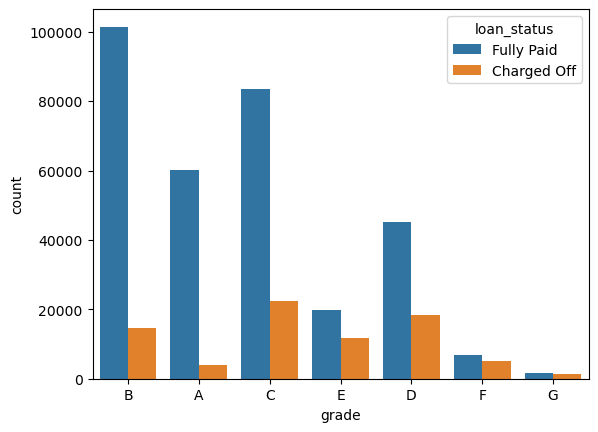

In [150]:
sns.countplot(x='grade', data=df1, hue='loan_status')

<span style="font-family: 'Times New Roman'; font-size: 18px;">
    
 Our goal is to generate a count plot for each grade, with the loan status label represented by different colors. This approach allows us to determine whether there is a distinction between completely settling your debt or having it written off according to your score. 
<br>The count plot illustrates a distinct correlation, indicating that the proportion of loans that have been charged off appears to rise with higher letter grades. It appears that the top-tier clients receive an A rating, while those in the next tier are assigned grades such as B, C, D, and so on.  
<br>In order to create the subsequent illustration, we generate a count plot that displays the distribution of subgrades across the complete dataset. What is the total count of A1s and A2s in our possession, among others? The predominant categories appear to be A, B, and C, which is somewhat logical since these loans carry a higher risk and are more prone to being written off, as indicated by the previous count plot of the overall grades. 
 </span>

C:\Users\rojin\AppData\Local\Temp\ipykernel_14876\1693477650.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sub_grade', data=df1, order= subgrade_order, palette='coolwarm')


<Axes: xlabel='sub_grade', ylabel='count'>

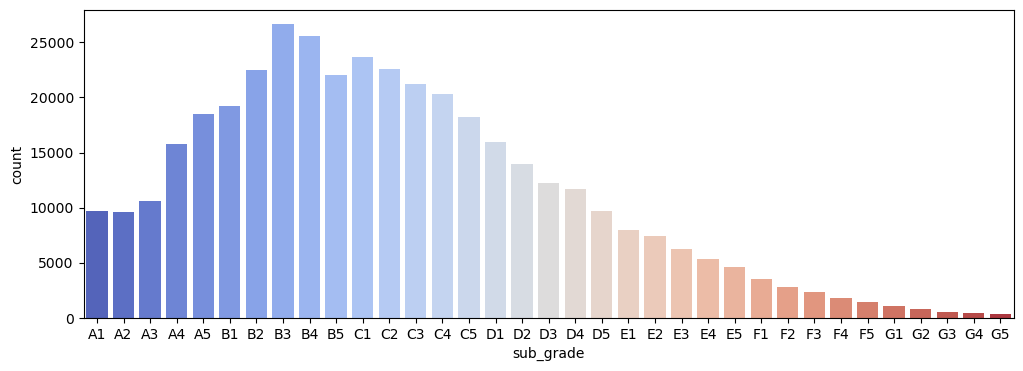

In [151]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df1['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df1, order= subgrade_order, palette='coolwarm')

<span style="font-family: 'Times New Roman'; font-size: 18px;">
It looks like the repayment for F and G subgrades happens rarely. Our goal is to focus on those specific subgrades and generate a count plot exclusively for them, incorporating hue as well. It appears that in the lowest grade classifications, the rate of accounts charged off is nearly identical to that of accounts that have been fully paid off. It could be beneficial to explore whether providing loans to individuals is worthwhile if we are going to assign them a grade of G or F. In our upcoming analysis, we will focus closely on that specific area of the data. We will apply a quick filter using pandas.     


 </span>

<Axes: xlabel='sub_grade', ylabel='count'>

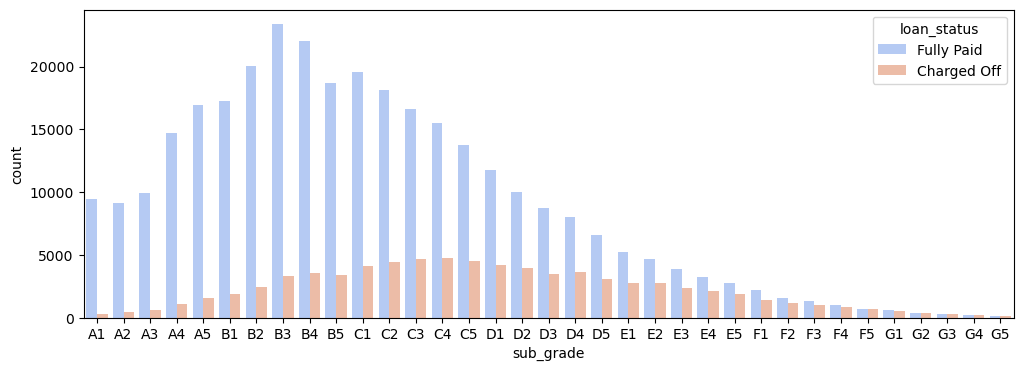

In [152]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df1['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df1, order= subgrade_order, palette='coolwarm', 
              hue='loan_status')

<span style="font-family: 'Times New Roman'; font-size: 18px;">
We can now observe the comparison between fully paid loans and those that have been charged off for these lower subgrades. It’s interesting to note that if you receive a G5 grade, the chances of completely paying off your loan are nearly equal to the chances of it being charged off.

 </span>

<Axes: xlabel='sub_grade', ylabel='count'>

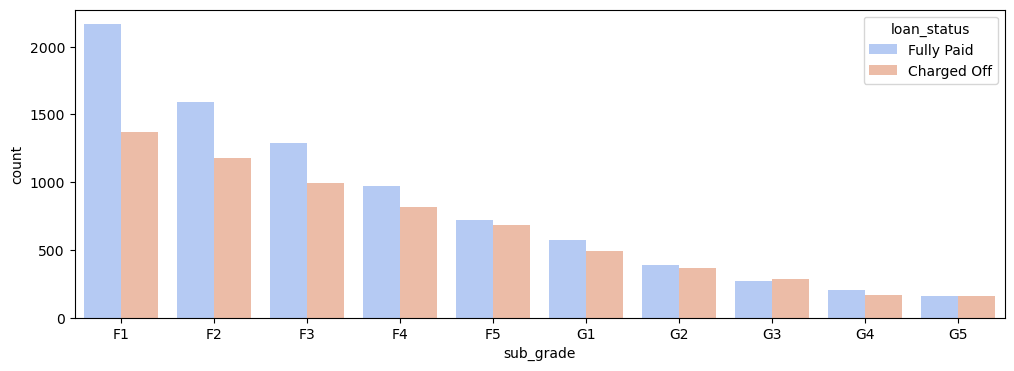

In [153]:
f_and_g = df1[(df1['grade']=='G') | (df1['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade', data=f_and_g, order= subgrade_order, palette='coolwarm', 
              hue='loan_status')

<span style="font-family: 'Times New Roman'; font-size: 18px;">
A new column named loan repaid will be established, where a value of one indicates that the loan has been completely paid off, while a value of zero signifies that it has been written off. 

 </span>

In [154]:
df['loan_repaid'] = df1['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})
df1['loan_repaid'] = df1['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

In [155]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,318357
1,1,318357
2,1,318357
3,1,318357
4,0,77673
...,...,...
396025,1,318357
396026,1,318357
396027,1,318357
396028,1,318357


<span style="font-family: 'Times New Roman'; font-size: 18px;">
We aim to develop a chart that highlights which numerical characteristics are most strongly associated with the actual label. The first step is to compute these correlation values. The subsequent action involves solely selecting the column that indicates loan repayment. It is evident that the interest rate exhibits the strongest inverse relationship with an individual's likelihood of repaying their loan, which is quite logical. If your loan comes with a very steep interest rate, you might struggle to repay it. 
 </span>

In [156]:
df.corr()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
loan_amnt,1.000000,-0.393862,0.168921,0.953929,-0.164253,-0.160692,0.030706,0.089134,0.094124,0.336887,...,-0.077779,0.328320,0.099911,0.223886,-0.077743,-0.014675,0.222315,-0.106539,0.000630,-0.059836
term,-0.393862,1.000000,-0.434594,-0.153378,0.308766,0.312086,-0.019534,-0.051494,-0.049468,-0.060330,...,0.018758,-0.084787,-0.055166,-0.101346,0.104799,0.013343,-0.096220,0.019826,0.001625,0.173246
int_rate,0.168921,-0.434594,1.000000,0.162758,-0.486888,-0.479354,-0.006188,0.003576,-0.038375,-0.056771,...,0.060986,-0.011280,0.293659,-0.036404,0.056161,-0.031520,-0.082583,0.057450,-0.000882,-0.247758
installment,0.953929,-0.153378,0.162758,1.000000,-0.145404,-0.139938,0.026732,0.078118,0.079079,0.330381,...,-0.067892,0.316455,0.123915,0.202430,-0.040731,-0.014835,0.193694,-0.098628,0.001277,-0.041082
grade,-0.164253,0.308766,-0.486888,-0.145404,1.000000,0.927388,-0.010117,-0.003018,0.007204,-0.023632,...,0.008728,-0.014259,-0.021758,-0.019062,0.002996,0.023961,0.000312,0.019369,-0.000560,0.149396
sub_grade,-0.160692,0.312086,-0.479354,-0.139938,0.927388,1.000000,-0.010357,-0.005530,0.005335,-0.025034,...,0.008936,-0.013001,-0.005704,-0.023071,0.007132,0.023566,-0.004801,0.019655,0.000259,0.149232
emp_title,0.030706,-0.019534,-0.006188,0.026732,-0.010117,-0.010357,1.000000,0.037248,-0.000399,0.011670,...,0.027026,0.007099,-0.014174,0.056744,-0.086461,-0.009423,0.020472,0.016897,-0.001095,-0.015310
emp_length,0.089134,-0.051494,0.003576,0.078118,-0.003018,-0.005530,0.037248,1.000000,0.050595,0.064455,...,0.026253,0.092106,0.033834,0.120120,-0.035663,-0.002846,0.201265,0.028215,-0.001267,0.014396
home_ownership,0.094124,-0.049468,-0.038375,0.079079,0.007204,0.005335,-0.000399,0.050595,1.000000,0.093064,...,-0.004231,0.059949,0.043559,0.098306,0.000341,-0.000804,0.249250,-0.004125,-0.001989,0.034768
annual_inc,0.336887,-0.060330,-0.056771,0.330381,-0.023632,-0.025034,0.011670,0.064455,0.093064,1.000000,...,-0.013720,0.299773,0.027871,0.193023,-0.041752,0.010861,0.236320,-0.050162,-0.000636,0.053432


<Axes: >

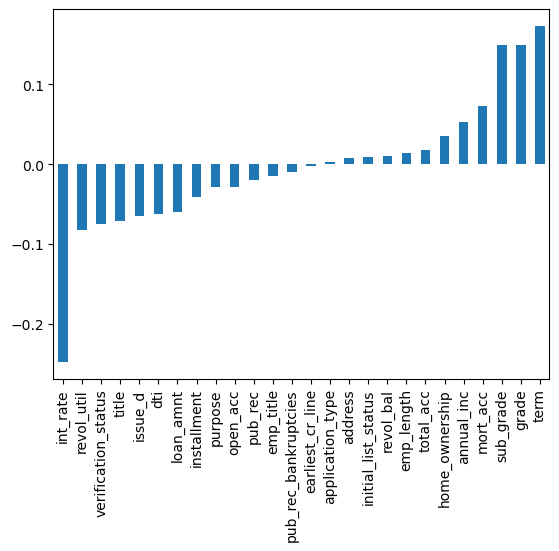

In [157]:
df.corr()['loan_repaid'].sort_values().drop(['loan_repaid','loan_status']).plot(kind='bar')

<span style="font-family: 'Times New Roman'; font-size: 18px;">
    
## Data PreProcessing

Our goal here is to eliminate or complete any gaps in the data. It is essential to eliminate redundant or superfluous functionalities and transform categorical string attributes into dummy variables. 

### Missing Data 
A range of criteria is employed to determine if the information should be retained, eliminated, or supplemented with the missing data.
 </span>

In [158]:
len(df)

396030

<span style="font-family: 'Times New Roman'; font-size: 18px;">
    
Our goal is to develop a sequence that illustrates the overall number of absent entries for each column.


 </span>

In [159]:
df1.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

<span style="font-family: 'Times New Roman'; font-size: 18px;">
    
We aim to modify this series so that it reflects the percentage of the complete DataFrame. There is a shortfall of 5.7% in job titles and nearly 10% in mortgage accounts. 

 </span>



In [160]:
100 * df1.isnull().sum()/len(df1)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

<span style="font-family: 'Times New Roman'; font-size: 18px;">
    
Let's take a closer look at emp_title and emp_length to assess whether we can safely eliminate them. A crucial question to pose is regarding the count of unique job titles in the employment sector. We're curious whether we'll eliminate the job title or replace it with something else. 
 </span>



In [161]:
df1['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

<span style="font-family: 'Times New Roman'; font-size: 18px;">
    
It becomes apparent that the number of titles is excessively high to transform this into a dummy variable feature. Incorporating an additional 173,000 boolean columns isn't feasible. Instead, we can focus on thorough feature engineering to classify these positions into high-income and medium-income categories. However, we must rely on numerous assumptions and determine a method to align this with more than 173,000 distinct job titles. The abundance of job titles is overwhelming, and many of them lack clarity since a significant number of individuals possess distinct titles. Therefore, we should eliminate these titles as they won't realistically serve our needs.  </span>

In [162]:
df1['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [163]:
df1_drop = df1.drop('emp_title',axis=1)

<span style="font-family: 'Times New Roman'; font-size: 18px;">
Our next step involves generating a count plot for the employment length feature. To arrange the values in a specific order, we can compile a list that reflects that sequence.     
  </span>

In [164]:
sorted(df1_drop['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [165]:
emp_length_order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<span style="font-family: 'Times New Roman'; font-size: 18px;">
A significant number of individuals appear to have been in their jobs for over a decade, which is quite logical. When someone takes out a loan, it’s highly probable that they are employed. Remember, our goal is to assess whether an individual will repay their loan. So, what is their loan situation? We are particularly interested in the connection between loans that are fully repaid and those that have been charged off, in relation to the duration of employment. If there is a significant disparity in these categories, it becomes a crucial factor. Conversely, if the ratio of fully paid loans to charged-off loans remains consistent across various employment lengths, it may not provide much insight. Our goal is to determine the proportion of individuals who have completely settled their debts compared to those whose debts have been written off, categorized by their duration of employment.   </span>

<Axes: xlabel='emp_length', ylabel='count'>

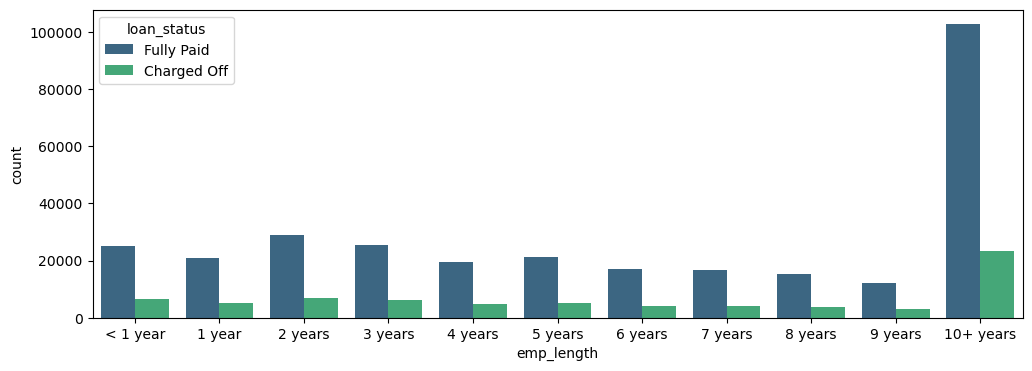

In [166]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length' , data=df1_drop, order=emp_length_order, hue='loan_status',palette='viridis')

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 
    We are looking to determine the proportion of individuals who fail to repay their loans compared to those who do, categorized by their employment status, and we wish to analyze the ratio between these two groups. 
  </span>

In [167]:
emp_co = df1_drop[df1_drop['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [168]:
emp_fp = df1_drop[df1_drop['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [169]:
emp_len = emp_co/(emp_co+emp_fp)

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 
    It appears that the duration of employment does not significantly impact the rates of charge-offs. It appears that, no matter how long someone has been employed, approximately 20 percent will still have outstanding loans that they haven't repaid. This can be illustrated using a bar chart. It is evident that percentages and ratios convey fundamentally identical information. Given that the heights of these bars are nearly identical, there is limited information or distinction among the columns representing employment duration. The primary distinction observed is that individuals with a decade of work experience exhibit a marginally lower charge-off rate compared to those who have been employed for less than a year. Nevertheless, the difference is not substantial enough to warrant the ongoing use of this feature. Because they are highly alike in every position, we will remove that particular column. 
  </span>

<Axes: xlabel='emp_length'>

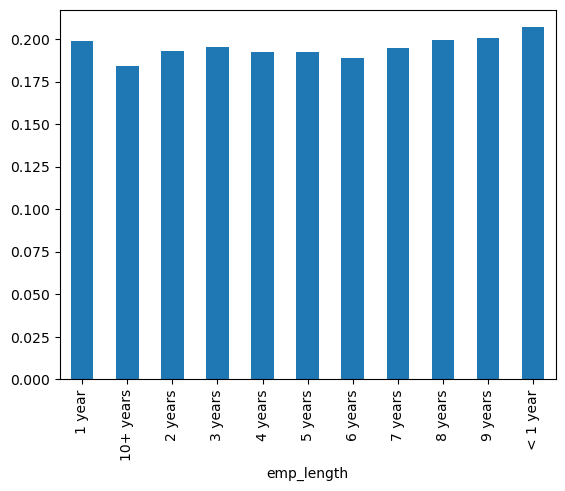

In [170]:
emp_len.plot(kind='bar')

In [171]:
df1_drop = df1_drop.drop('emp_length',axis=1)

In [172]:
df1_drop.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 

## Categorical data
We take a look at the section dedicated to the title and  purpose. 

    
  </span>

In [173]:
df1_drop['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 

The title column serves merely as a descriptive label or subcategory for its intended function, so it would be logical to eliminate that column altogether. 

  </span>

In [174]:
df1_drop['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [175]:
df1_drop = df1_drop.drop('title',axis=1)

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 

The variable 'mort_acc' represents the number of mortgage accounts individuals possess. We will generate a count of these values. It appears that a significant portion of the population, nearly 25%, has no additional mortgage accounts, while others have one, two, and so forth. Interestingly, there are some outliers in this dataset, including an individual with as many as 34 mortgage accounts, but we will include these in our analysis. We're curious about how to handle this column and the extent of missing data it contains. Nearly 10% of the entries in this mortgage account number are incomplete. This implies that we are unable to remove the rows. In that case, we would forfeit 10% of our data. Should we consider eliminating the feature altogether as an alternative? There isn't a definitive solution in this case; it's perfectly acceptable to disregard it, yet you're not losing out on significant information either. Only 10% of the task remains to be finished. Is there a method to complete this data? One strategy could involve identifying which of the other available features, for which we have complete information, strongly correlates with these mortgage accounts, and then using that correlation to supplement our data. 

  </span>

In [176]:
df1_drop['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 
Numerous strategies exist for addressing gaps in data. Let's take a look at the columns that have the highest correlation with the mortgage accounts column. We aim to analyze the relationship between the mortgage account column and all the numerical columns we currently have. 

  </span>

In [177]:
non_numeric_columns2 = []
for column in df1_drop.columns:
    try:
        df1_drop[column].astype(float)
    except ValueError:
        non_numeric_columns2.append(column)

print("Columns that cannot be converted to float:", non_numeric_columns2)

df2_drop=pd.DataFrame()

# Apply frequency encoding to non-numeric columns
df2_drop = df1_drop.copy()
for column in non_numeric_columns2:
    freq_encoding = df1_drop[column].value_counts().to_dict()
    df2_drop[column] = df1_drop[column].map(freq_encoding)

Columns that cannot be converted to float: ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']


In [178]:
df2_drop.corr()['mort_acc'].sort_values()

term                   -0.096220
int_rate               -0.082583
earliest_cr_line       -0.060980
initial_list_status    -0.026847
dti                    -0.025439
purpose                -0.005289
sub_grade              -0.004801
address                -0.001147
grade                   0.000312
application_type        0.001338
revol_util              0.007514
pub_rec                 0.011552
issue_d                 0.022778
pub_rec_bankruptcies    0.027239
loan_status             0.073111
loan_repaid             0.073111
verification_status     0.087407
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
home_ownership          0.249250
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 
It's noteworthy that we possess this comparable column for total accounts, and while the correlation isn't flawless, indicating that the data isn't duplicated, it does show a fairly strong positive relationship. As a result, the overall account feature is linked to the mortgage account feature This aligns well with the idea that the total number of accounts is linked to the quantity of mortgage accounts. Consequently, we should move forward with the fillna function. We will arrange the DataFrame according to the total number of accounts and calculate the average for mortgage accounts linked to each total account record. Subsequently, we will utilize the mean to complete the mortgage account section where data is lacking. In order to achieve this, we create a function. 
  </span>

In [179]:
total_acc_avg = df2_drop.groupby('total_acc').mean()['mort_acc']

In [180]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [181]:
df2_drop['mort_acc'] = df2_drop.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 
It has come to our attention that there are two absent data columns: revol_util and public recorded bankruptcies. Nevertheless, this constitutes merely a tiny fraction of our complete dataset, totaling no more than 535 and 276. We can simply remove these rows. </span>

In [182]:
df2_drop.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [183]:
df2_drop= df2_drop.dropna()

In [184]:
df2_drop.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 

### Categorical Variables and Dummy Variables
With the missing data now taken care of, we are ready to tackle the string values linked to the categorical columns. 
    </span>

In [185]:
df2_drop.dtypes

loan_amnt               float64
term                      int64
int_rate                float64
installment             float64
grade                     int64
sub_grade                 int64
home_ownership            int64
annual_inc              float64
verification_status       int64
issue_d                   int64
loan_status               int64
purpose                   int64
dti                     float64
earliest_cr_line          int64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status       int64
application_type          int64
mort_acc                float64
pub_rec_bankruptcies    float64
address                   int64
loan_repaid               int64
dtype: object

In [186]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

In [188]:
#feat_info('term')

In [189]:
df2_drop['term'].value_counts()

term
302005    301247
94025      93972
Name: count, dtype: int64

In [190]:
df1.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
loan_repaid               int64
dtype: object

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 

### Term feature
It is essential to change the feature designation into a numeric data type of either 36 or 60 integers by utilizing the .apply() or .map() functions.      </span>

In [191]:
df2_drop['term'] = df1['term'].apply(lambda term: int(term[:3]))

In [192]:
df2_drop['term'].value_counts()

term
36    301247
60     93972
Name: count, dtype: int64

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 

### Grade feature
Since we understand that grade is included within sub_grade, we can simply remove the grade attribute. 
     </span>

In [193]:
df2_drop = df2_drop.drop('grade',axis=1)

In [194]:
df2_drop.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 

At this point, we aim to convert the sub_grade columns into dummy variables and
subsequently merge these new columns with the existing data frame.To prevent any redundancy problems, we eliminate the initial column from our dataset.      </span>

In [195]:
dummies = pd.get_dummies(df2_drop['sub_grade'], drop_first =True)

In [196]:
dummies

,374,552,754,1058,1397,1787,2286,2766,3536,4572,...,18526,19182,20280,21221,22085,22495,22580,23662,25601,26655
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
396026,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
396027,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
396028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [197]:
df2_drop.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [198]:
df2_drop.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,25601,159790,117000.0,125082,11705,318357,...,0.0,36369.0,41.8,25.0,157964,395319,0.0,0.0,1,1
1,8000.0,36,11.99,265.68,22085,198348,65000.0,125082,11705,318357,...,0.0,20131.0,53.3,27.0,238066,395319,3.0,0.0,1,1
2,15600.0,36,10.49,506.97,26655,159790,43057.0,131385,11705,318357,...,0.0,11987.0,92.2,26.0,238066,395319,0.0,0.0,1,1
3,7200.0,36,6.49,220.65,9567,159790,54000.0,125082,8858,318357,...,0.0,5472.0,21.5,13.0,238066,395319,0.0,0.0,1,1
4,24375.0,60,17.27,609.33,18244,198348,55000.0,139563,6970,77673,...,0.0,24584.0,69.8,43.0,238066,395319,1.0,0.0,1,0


<span style="font-family: 'Times New Roman'; font-size: 18px;"> 
In this section, you'll see an increase in the number of columns due to the implementation of one hot encoding for every potential sub_grade. We ended up discarding the initial one, which happened to be A_1.      </span>

In [199]:
df2_drop=pd.concat([df2_drop.drop('sub_grade',axis=1),dummies],axis=1)

In [200]:
df2_drop

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,18526,19182,20280,21221,22085,22495,22580,23662,25601,26655
0,10000.0,36,11.44,329.48,159790,117000.0,125082,11705,318357,2452,...,False,False,False,False,False,False,False,False,True,False
1,8000.0,36,11.99,265.68,198348,65000.0,125082,11705,318357,234507,...,False,False,False,False,True,False,False,False,False,False
2,15600.0,36,10.49,506.97,159790,43057.0,131385,11705,318357,83019,...,False,False,False,False,False,False,False,False,False,True
3,7200.0,36,6.49,220.65,159790,54000.0,125082,8858,318357,83019,...,False,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,609.33,198348,55000.0,139563,6970,77673,83019,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,159790,40000.0,131385,8401,318357,234507,...,False,False,False,False,False,False,False,False,True,False
396026,21000.0,36,12.29,700.42,198348,110000.0,131385,7167,318357,234507,...,False,False,False,False,False,False,False,True,False,False
396027,5000.0,36,9.99,161.32,159790,56500.0,139563,10047,318357,234507,...,False,True,False,False,False,False,False,False,False,False
396028,21000.0,60,15.31,503.02,198348,64000.0,139563,4220,318357,234507,...,False,False,False,False,False,False,True,False,False,False


<span style="font-family: 'Times New Roman'; font-size: 18px;"> 
    
### Verification_status, application_type, initial_list_status, purpose columns
The same tasks will be executed with dummy variables applied to the indicated columns. These columns verification_status, application_type, initial_list_status and purpose
  are suitable for being treated as dummy variables since they have limited categories, primarily consisting of binary choices or just a handful of options. 

</span>

In [201]:
dumies = pd.get_dummies(df2_drop[['verification_status','application_type',
                                  'initial_list_status','purpose']],drop_first=True)

In [202]:
df2_drop = pd.concat([df2_drop.drop(['verification_status','application_type',
                                  'initial_list_status','purpose'],axis=1),dummies],axis=1)

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 
    
### Home_ownership column
To assess home ownership, we will proceed to analyze the value counts. Because there's so few people in 'none' or 'any' columns lets just put these categories in the other category. In order to achieve this, we substitute 'none' and 'any' with 'other' by utilizing the replace function. 

</span>

In [203]:
df1['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [204]:
df2_drop['home_ownership']= df1['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [205]:
df2_drop['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: count, dtype: int64

In [206]:
dummies = pd.get_dummies(df2_drop['home_ownership'])
df2_drop=pd.concat([df2_drop.drop('home_ownership',axis=1),dummies],axis=1)

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 
    
### Address column
Our goal is to develop a zip code column derived from the address information in the dataset with feature engineering, which will be labeled zip_code and will isolate the zip code from the address. 

</span>

In [207]:
df2_drop['zip_code']=df1['address'].apply(lambda address:address[-5:])

In [208]:
df2_drop['zip_code'].value_counts()

zip_code
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 
We aim to convert the zip_code column into dummy variables utilizing pandas. And concatenate the result and drop the original zip_code column along with dropping the address column. 

</span>

In [209]:
dummies = pd.get_dummies(df2_drop['zip_code'])
df2_drop=pd.concat([df2_drop.drop('zip_code',axis=1),dummies],axis=1)

In [210]:
df2_drop = df2_drop.drop('address', axis=1)

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 
    
### Issue_d
The issued_d column indicates the month in which the loan was funded. While this information is useful for historical analysis, it isn't relevant for the predictive model we aim to build. The objective of our model is to predict whether a borrower will repay their loan based on the features available before the loan is issued. Therefore, we drop this column. 
</span>

In [212]:
#feat_info('issue_d')

In [213]:
df2_drop = df2_drop.drop('issue_d',axis=1)

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 
    
### earliest_cr_line
This column seems to indicate the month when the borrower's first recorded credit account was established. This feature acts as a historical time stamp, and we will employ the .apply method to extract the year from it. We will take the final four characters of the string and change them into an integer. We don't need to convert this to dummy variables because the year itself can be treated as a continuous data type. 

</span>

In [214]:
df2_drop['earliest_cr_line']=df1['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [215]:
df2_drop['earliest_cr_line'].value_counts()

earliest_cr_line
2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: count, Length: 65, dtype: int64

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 

### Train Test Split 
The following action involves importing the train test split function from sklearn. Next, we need to remove the 'loan_status' column because it essentially duplicates the loan repaid column. We will rely on the loan_repaid column, which is already formatted in binary (0s and 1s).</span>

In [216]:
from sklearn.model_selection import train_test_split

In [217]:
df2_drop = df2_drop.drop('loan_status', axis=1)

In [218]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [219]:
X = df2_drop.drop('loan_repaid', axis=1).values

In [220]:
y = df2_drop['loan_repaid'].values

In [221]:
print(len(df))

396030


<span style="font-family: 'Times New Roman'; font-size: 18px;"> 

Next, we perform a train test split with test_size=0.2 and a random_state=101.  </span>

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 

### Normalizing the Data 
At this point, we apply a MinMaxScaler to standardize the feature datasets X_train and X_test. It's important to remember that we aim to prevent any data leakage from the test set, so we exclusively fit the scaler using the X_train data.

</span>

In [223]:
from sklearn.preprocessing import MinMaxScaler

In [224]:
scaler = MinMaxScaler()

In [225]:
X_train = scaler.fit_transform(X_train)

In [226]:
X_test = scaler.transform(X_test)

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 

### Creating the Model 
We've imported the necessary libraries to build a neural network. Sequential is used for stacking layers; Dense for fully connected layers; and Dropout to prevent overfitting. We also import TensorFlow (tf) for model creation and training. This setup is foundational for deep learning projects. 
<br>
Upon examining X_train, we observe that it begins with 78 attributes. Therefore, we will align our initial layer accordingly. Our activation function is a rectified linear unit. And to prevent overfitting we add a Dropout layer. We're going to continue with the same code, but reduce the number of neurons about in half for each layer. The final layer we need to configure is crucial for our task. Remember, we are essentially conducting a binary classification, which necessitates having a single neuron at the end. Therefore, we will set up one dense neuron with a unit count of one, utilizing a sigmoid activation function.
<br>
Next, we will assemble the model, and this is the point where you must ensure everything aligns. Since we are conducting a binary classification, the appropriate loss function to use is binary_crossentropy. I will opt for the Adam optimizer.</span>

In [227]:
X_train.shape

(316175, 96)

In [228]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 

### Fit the model
We trained the model for a total of 25 epochs. Given the size of this dataset, it's advisable to process it in smaller groups, so we will set the batch size to 256. Ultimately, we aim to include our validation dataset to visualize the losses and determine if we are experiencing any overfitting issues.</span>

In [229]:
model.fit(x=X_train, y=y_train,epochs=25, batch_size=256,
          validation_data = (X_test, y_test))

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.3358 - val_loss: 0.2637
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2640 - val_loss: 0.2623
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2631 - val_loss: 0.2624
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2615 - val_loss: 0.2624
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2617 - val_loss: 0.2618
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2607 - val_loss: 0.2621
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2597 - val_loss: 0.2621
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2600 - val_loss: 0.2616
Epoch 9/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2607 - val_loss: 0.2617
Epoch 10/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2593 - val_loss: 0.2617
Epoch 11/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2585 - val_loss: 0.2615
Epoch 12/25
1236/1236 ━━━━━━━━

In [230]:
from tensorflow.keras.models import load_model

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 
We save our model in the following code.
</span>

In [231]:
model.save('myfavoritemodel.h5')

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 
    
### Evaluating model performance
We should concentrate on assessing how well the model is performing. Remember that during the training phase, we included both our training and validation datasets; now, let's proceed to visualize those results. 

</span>

In [232]:
losses = pd.DataFrame(model.history.history)

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 

When we analyze the losses, it becomes evident that there are two types: the training loss and the validation loss. The validation loss represents the error measured on our validation dataset during training. When we visualize this data, we observe a comparable trend where both the training and validation losses decline; however, over time, the improvement in validation loss becomes minimal.
<br>
An intriguing approach would be to implement an early stopping callback while extending the training over many more epochs to observe whether the graph would have persisted in its downward trend or begun to rise.

</span>

<Axes: >

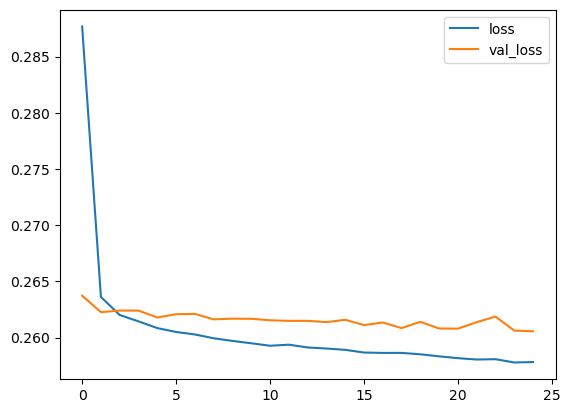

In [233]:
losses.plot()

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 
    
### Conclusion and model interpretation
    
Since this is a task involving classification, various metrics will be utilized. We can assess this using various metrics, including accuracy, precision, recall, and the F1 score. Therefore, accuracy refers to the true percentage of correct responses, and we are aiming for approximately 90% accuracy. 
<br>
For recall I have to say there is an imbalanced label.  The number of loans that are completely paid off significantly exceeds the amount that has been written off. 
<br>
Upon examining our initial dataframe and calculating the proportion of its length, we discover that 80% of the instances were already classified as loans that would be repaid. This suggests that creating a simple model predicting full repayment of all loans would yield an accuracy rate of 80%. Be cautious of a model that claims to achieve 80% accuracy, as a model that simply predicts every loan will be repaid will naturally reach around 80% accuracy on this specific test dataset. We ought to aim for a minimum benchmark of 80%, indicating that while our 89% accuracy in the metric is acceptable, it isn't exceptional due to the uneven distribution of our dataset. 
<br>
The key performance indicators we need to examine include precision, recall, and the F1 score, and it appears that our performance varies slightly based on the class. The class we need to focus on is the one with fewer instances, specifically the zero class, as it has significantly less representation. Although our accuracy is impressive, we face challenges with recall, which in turn impacts our F1 score that reflects the mean of both precision and recall. 
<br>
The real indicator of the model's performance lies in the F1 score for the zero class. Whether this score is favorable or not is contingent upon the broader context, including any existing models that aim to predict this and their respective F1 scores. We require additional context to evaluate if the recall and F1 score are satisfactory. However, it is evident that this accuracy surpasses a mere default guess, which would typically be around 80%. This approach is certainly superior to merely making a haphazard or direct assumption. As a result, our performance has significantly improved.
<br>
A chance selection would yield an accuracy rate of 50%. Assuming that repayment will always occur would yield an accuracy rate of 80%. Our model achieves an accuracy rate of 89%. Thus, our performance surpasses that of a mere chance prediction and a straightforward loan repayment outcome. 
</span>

In [234]:
from sklearn.metrics import classification_report, confusion_matrix

In [235]:
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype("int32")
report = classification_report(y_test, predicted_classes,zero_division=1)

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step


In [236]:
print(report)

              precision    recall  f1-score   support

           0       0.99      0.44      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [238]:
df['loan_repaid'].value_counts()

loan_repaid
1    318357
0     77673
Name: count, dtype: int64

In [239]:
318357/len(df)

0.8038709188697826

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 
This confusion matrix reveals a significant amount of incorrect classification of zero points, leading to a diminished recall rate. 

</span>

In [240]:
confusion_matrix(y_test,predicted_classes)

array([[ 6824,  8834],
       [   95, 63291]], dtype=int64)

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 
Considering the previous assignment regarding the customer mentioned below, would you extend a loan to this individual? We will apply our model to evaluate one specific person. Therefore, we will import the random seed, assign it a value of 101, and subsequently generate a random index based on this setting. Next, from this arbitrary index, we will select a new customer and showcase their actual characteristics.
<br>
It’s important to confirm that what we have is not a pandas series; rather, it is a NumPy array. 
</span>

In [241]:
import random
random.seed(101)
random_ind =random.randint(0,len(df))

new_customer = df2_drop.drop('loan_repaid', axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.0
term                60
int_rate         18.24
installment     638.11
annual_inc     61665.0
                ...   
30723             True
48052            False
70466            False
86630            False
93700            False
Name: 305323, Length: 96, dtype: object

<span style="font-family: 'Times New Roman'; font-size: 18px;"> 
Then we make sure that we scale this data in order to predict a correct class. 
Then we pass it to our model. </span>

In [243]:
new_customer = scaler.transform(new_customer.values.reshape(1,96))

In [244]:
#model.predict_classes(new_customer)

predictions = model.predict(new_customer)
# Convert probabilities to class labels (assuming binary classification with 0.5 threshold)
predicted_classes = (predictions > 0.5).astype("int32")

predicted_classes


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[1]])

<span style="font-family: 'Times New Roman'; font-size: 18px;">

### Testing the model
    
Upon executing that, we observe that our model forecasts it to be a one. Therefore, our forecast was accurate in this specific example.
 </span>

In [245]:
df.iloc[random_ind]['loan_repaid']

1.0